In [1]:
# Notebook done by Eric Englin with the Data Science Club
# This dataset comes from the DonorsChoose.org Application Screening Challenge
# Found at: https://www.kaggle.com/c/donorschoose-application-screening


import pandas as pd
train = pd.read_csv(r"/Users/ericenglin/Desktop/Data Science Club/Data/Donors Choose Screen/train.csv")

In [179]:
train.head()

id                        teacher_id teacher_prefix school_state  \
0  p036502  484aaf11257089a66cfedc9461c6bd0a            Ms.           NV   
1  p039565  df72a3ba8089423fa8a94be88060f6ed           Mrs.           GA   
2  p233823  a9b876a9252e08a55e3d894150f75ba3            Ms.           UT   
3  p185307  525fdbb6ec7f538a48beebaa0a51b24f            Mr.           NC   
4  p013780  a63b5547a7239eae4c1872670848e61a            Mr.           CA   

  project_submitted_datetime project_grade_category  \
0        2016-11-18 14:45:59          Grades PreK-2   
1        2017-04-26 15:57:28             Grades 3-5   
2        2017-01-01 22:57:44             Grades 3-5   
3        2016-08-12 15:42:11             Grades 3-5   
4        2016-08-06 09:09:11             Grades 6-8   

            project_subject_categories  \
0                  Literacy & Language   
1    Music & The Arts, Health & Sports   
2  Math & Science, Literacy & Language   
3                      Health & Sports   
4                      Health & Sports   

            project_subject_subcategories  \
0                                Literacy   
1            Performing Arts, Team Sports   
2  Applied Sciences, Literature & Writing   
3                       Health & Wellness   
4                       Health & Wellness   

                                       project_title  \
0                           Super Sight Word Centers   
1                             Keep Calm and Dance On   
2                              Lets 3Doodle to Learn   
3  \"Kid Inspired\" Equipment to Increase Activit...   
4   We need clean water for our culinary arts class!   

                                     project_essay_1  \
0  Most of my kindergarten students come from low...   
1  Our elementary school is a culturally rich sch...   
2  Hello;\r\nMy name is Mrs. Brotherton. I teach ...   
3  My students are the greatest students but are ...   
4  My students are athletes and students who are ...   

                                     project_essay_2 project_essay_3  \
0  I currently have a differentiated sight word c...             NaN   
1  We strive to provide our diverse population of...             NaN   
2  We are looking to add some 3Doodler to our cla...             NaN   
3  The student's project which is totally \"kid-i...             NaN   
4  For some reason in our kitchen the water comes...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need 6 Ipod Nano's to create and d...   
1             NaN  My students need matching shirts to wear for d...   
2             NaN  My students need the 3doodler. We are an SEM s...   
3             NaN  My students need balls and other activity equi...   
4             NaN  My students need a water filtration system for...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                            26                    1  
1                                             1                    0  
2                                             5                    1  
3                                            16                    0  
4                                            42                    1

In [118]:
train[['project_is_approved']].groupby(train['project_is_approved']).agg(['mean', 'count'])


project_is_approved        
                                   mean   count
project_is_approved                            
0                                     0   27734
1                                     1  154346

In [98]:
train.shape

(182080, 16)

In [99]:
# For our predictive model to be worth anything, we'll need to predict more than 84.7% correctly
# Because we could get 84.7% correct just by predicting that every project will be approved

154346/182080 #84.7%

0.8476823374340949

In [3]:
train.project_grade_category.unique()

array(['Grades PreK-2', 'Grades 3-5', 'Grades 6-8', 'Grades 9-12'],
      dtype=object)

In [121]:
train[['project_is_approved']].groupby(train['project_subject_categories']).agg(['mean', 'count'])



project_is_approved       
                                                          mean  count
project_subject_categories                                           
Applied Learning                                      0.814897   6310
Applied Learning, Health & Sports                     0.813360   1018
Applied Learning, History & Civics                    0.795380    303
Applied Learning, Literacy & Language                 0.861208   3725
Applied Learning, Math & Science                      0.803624   1711
Applied Learning, Music & The Arts                    0.809831   1241
Applied Learning, Special Needs                       0.811769   2481
Applied Learning, Warmth, Care & Hunger               0.636364     22
Health & Sports                                       0.846794  16951
Health & Sports, Applied Learning                     0.851852    297
Health & Sports, History & Civics                     0.820896     67
Health & Sports, Literacy & Language                  0.847859   1308
Health & Sports, Math & Science                       0.848936    470
Health & Sports, Music & The Arts                     0.782443    262
Health & Sports, Special Needs                        0.861064   2368
Health & Sports, Warmth, Care & Hunger                0.903226     31
History & Civics                                      0.831974   3065
History & Civics, Applied Learning                    0.753846     65
History & Civics, Health & Sports                     0.900000     20
History & Civics, Literacy & Language                 0.885490   2288
History & Civics, Math & Science                      0.853333    525
History & Civics, Music & The Arts                    0.821691    544
History & Civics, Special Needs                       0.815348    417
History & Civics, Warmth, Care & Hunger               0.000000      1
Literacy & Language                                   0.869858  39257
Literacy & Language, Applied Learning                 0.859345   1038
Literacy & Language, Health & Sports                  0.771654    127
Literacy & Language, History & Civics                 0.890494   1315
Literacy & Language, Math & Science                   0.867219  24499
Literacy & Language, Music & The Arts                 0.838777   2878
Literacy & Language, Special Needs                    0.854450   6685
Literacy & Language, Warmth, Care & Hunger            0.840000     25
Math & Science                                        0.821082  28555
Math & Science, Applied Learning                      0.832448   2071
Math & Science, Health & Sports                       0.780488    697
Math & Science, History & Civics                      0.858326   1087
Math & Science, Literacy & Language                   0.861046   3843
Math & Science, Music & The Arts                      0.827961   2761
Math & Science, Special Needs                         0.825581   3010
Math & Science, Warmth, Care & Hunger                 0.631579     19
Music & The Arts                                      0.850006   8527
Music & The Arts, Applied Learning                    0.714286     21
Music & The Arts, Health & Sports                     0.656250     32
Music & The Arts, History & Civics                    0.793103     29
Music & The Arts, Special Needs                       0.863830    235
Music & The Arts, Warmth, Care & Hunger               0.666667      3
Special Needs                                         0.809483   7065
Special Needs, Health & Sports                        0.765625     64
Special Needs, Music & The Arts                       0.827255    521
Special Needs, Warmth, Care & Hunger                  0.771429     35
Warmth, Care & Hunger                                 0.921953   2191

In [5]:
len(train.index)

182080

In [6]:
# Bringing in resources dataset 

resources = pd.read_csv(r"/Users/ericenglin/Desktop/Data Science Club/Data/Donors Choose Screen/resources.csv")

In [7]:
resources.head()

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  
0  149.00  
1   14.95  
2    8.45  
3   13.59  
4   24.95

In [8]:
len(resources.index)

1541272

In [9]:
# Want to aggregate this dataset so that we can join it with the training dataset

resource_new = resources.groupby(['id']).agg({
    'quantity':sum,
    'id':["count"],
    'price':sum})

resource_new.columns = ['total requested items', 'different items requests','cost requested']
resource_new.head()

total requested items  different items requests  cost requested
id                                                                      
p000001                      7                         4          459.56
p000002                     21                        14          515.89
p000003                      4                         4          298.97
p000004                     98                        95         1113.69
p000005                      8                         4          485.99

In [26]:
# Quality check
resource_new.describe()

total requested items  different items requests  cost requested
count          260115.000000             260115.000000   260115.000000
mean               16.949515                  5.925348      297.950077
std                26.353225                  8.324707      368.754986
min                 1.000000                  1.000000        0.660000
25%                 4.000000                  1.000000      104.745000
50%                 9.000000                  3.000000      206.020000
75%                21.000000                  7.000000      379.640000
max               930.000000                100.000000     9999.000000

In [11]:
# Bring out id column so that we can join with the training dataset
# Data Note: Resources has info with both training and unknown test dataset, so we just want the training id's
resource_new['id'] = resource_new.index
resource_new.tail()

total requested items  different items requests  cost requested  \
id                                                                         
p260111                     27                        27          176.08   
p260112                      6                         2           39.79   
p260113                      3                         3          811.49   
p260114                     39                        10          222.56   
p260115                      2                         2          318.97   

              id  
id                
p260111  p260111  
p260112  p260112  
p260113  p260113  
p260114  p260114  
p260115  p260115

In [178]:
merge_train = pd.merge(train, resource_new, on='id') #merge on id
merge_train.head(100)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: FutureWarning: 'id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


id                        teacher_id teacher_prefix school_state  \
0   p036502  484aaf11257089a66cfedc9461c6bd0a            Ms.           NV   
1   p039565  df72a3ba8089423fa8a94be88060f6ed           Mrs.           GA   
2   p233823  a9b876a9252e08a55e3d894150f75ba3            Ms.           UT   
3   p185307  525fdbb6ec7f538a48beebaa0a51b24f            Mr.           NC   
4   p013780  a63b5547a7239eae4c1872670848e61a            Mr.           CA   
5   p063374  403c6783e9286e51ab318fba40f8d729           Mrs.           DE   
6   p103285  4e156c5fb3eea2531601c8736f3751a7           Mrs.           MO   
7   p181781  c71f2ef13b4bc91afac61ca8fd4c0f9f           Mrs.           SC   
8   p114989  b580c11b1497a0a67317763b7f03eb27            Ms.           IN   
9   p191410  2071fb0af994f8f16e7c6ed0f35062a1           Mrs.           IL   
10  p030093  b9e731e16ad8669f37a43e5316518106        Teacher           VA   
11  p226941  103cc1667cf9361bf1c58c8425e76e95           Mrs.           CA   
12  p225747  4681d60136ea859084ab488f2254b219            Ms.           PA   
13  p173555  9b7f355e34bc9ca5740779b69ee14d8e           Mrs.           NY   
14  p055350  882c8ddea1d5c4c31976e34f20b461f9            Ms.           FL   
15  p060293  74c7a7de62df6005b718dfea1447c745           Mrs.           NJ   
16  p199435  d69e412550b14dd8286e347f726908c2            Mr.           TX   
17  p074849  5d710e545d6952a3c12bfb45a7f9f08c           Mrs.           IN   
18  p232007  e7a8f866e3174a77ffe37323f032a8ac           Mrs.           FL   
19  p037127  b21174f6246deadc11c2157a958d7953           Mrs.           LA   
20  p230221  3bfe21c62feb8fd744a696a36487b452           Mrs.           PA   
21  p116615  b3593a375f2cf7fd4469b928ffac1c95           Mrs.           NY   
22  p106275  4ee410ea0ea8a0b4660b56c2f3648bbf            Ms.           NC   
23  p070918  a22774168d7910adce6969c8d8faee7c            Mr.           TX   
24  p144291  fdf9938d5f9e381630384c2452b159e0           Mrs.           PA   
25  p116102  efc95ee511efe14d1955789663317432           Mrs.           NC   
26  p070029  b74b266d6e52c0348a8dcef8b0ea4a2b           Mrs.           NJ   
27  p107356  f4594111d55f22ee3ed5e8e4a1c2852b            Ms.           UT   
28  p031939  32a2fb6f6a1aca27a686cea452973f03            Mr.           ID   
29  p044085  65f5f57c7b035d58ec095602a8f7dcf6           Mrs.           OH   
..      ...                               ...            ...          ...   
70  p100203  ae538de782db957f784d0eb2abf1aec3            Ms.           FL   
71  p216335  06ac5121c71ac3a4aae34a8ee59e75ab            Ms.           WI   
72  p215118  24e1f07552982b0b7d1c6d6a8b08773e           Mrs.           MN   
73  p123326  e765872bf5c5045c159b757583b33ca3            Ms.           CA   
74  p216043  720e58234cad163b74c21be2f2d23491        Teacher           MO   
75  p190639  1921ac6e9b66c4d58140536b793f2ad2           Mrs.           GA   
76  p035608  e61641cad6c7fe389446286ab58d675a            Ms.           GA   
77  p194533  9530ab8a78448791d133d13b2c7c11d1           Mrs.           MI   
78  p005330  280182b5719d5acc7aeb4304af3df65e            Ms.           IL   
79  p217173  9f936ea91f1a712eeea368f99a383268           Mrs.           OK   
80  p243195  1f3721218beb28b4831e0446c0500a7b           Mrs.           AL   
81  p204162  eb4c09521349cf8313bd719fc2b9f3db           Mrs.           CA   
82  p088899  9b58caab6f7c442566ee1eb22148a1c6           Mrs.           SC   
83  p218286  a894f9627757603938ebb2b54c54267b           Mrs.           NY   
84  p024688  2537c362d86a9b84f05f1b360aa11ff1           Mrs.           SC   
85  p148544  f02b76b46bf631d23826e5e82452268e            Ms.           CT   
86  p061723  a47b48b4fe9ed4a0259bede1eeec2471           Mrs.           NC   
87  p062414  d02a6876dee2ab709295b00bd3920859           Mrs.           CA   
88  p150704  969fdff9e00f9cd7c30ef522668fa0d0            Ms.           NY   
89  p064902  0361569c8fe6988d4f64c4804844e60c            Mr.           MI   
90  p

In [13]:
merge_train.describe()

teacher_number_of_previously_posted_projects  project_is_approved  \
count                                 182080.000000        182080.000000   
mean                                      11.237055             0.847682   
std                                       28.016086             0.359330   
min                                        0.000000             0.000000   
25%                                        0.000000             1.000000   
50%                                        2.000000             1.000000   
75%                                        9.000000             1.000000   
max                                      451.000000             1.000000   

       total requested items  different items requests  cost requested  
count          182080.000000             182080.000000   182080.000000  
mean               16.971447                  5.941509      297.731304  
std                26.241957                  8.349074      366.718002  
min                 1.000000                  1.000000        0.660000  
25%                 4.000000                  1.000000      104.480000  
50%                 9.000000                  3.000000      205.980000  
75%                21.000000                  7.000000      379.000000  
max               930.000000                100.000000     9999.000000

In [14]:
merge_train.to_csv('merge_train.csv')

In [89]:
# Now that we have our dataset together, we want to do some more exploratory data analysis
# First area of exploration: Those that post a lot tend to request less for each post

import matplotlib.pyplot  as plt
plt.scatter(merge_train['teacher_number_of_previously_posted_projects'],merge_train['cost requested'])
plt.title('EDA Graph 1')
plt.xlabel('Number of Previously Posted Projects')
plt.ylabel('Cost Requested')
plt.show()

In [88]:
# We have 4 quantitative fields that may predict for a project getting approved
# Want to check if these are correlated with eachother

import seaborn as sb

sb.heatmap(merge_train.corr())  
plt.title('EDA Graph 2: Correlation Matrix')
plt.show()

In [91]:
import matplotlib.pyplot as plt
plt.hist(merge_train['project_is_approved'])
plt.title("EDA Graph 3")
plt.show()

In [25]:
# Now want to eyeball test the how related project_is_approved is with our 4 fields

merge_train.groupby("project_is_approved").mean()

teacher_number_of_previously_posted_projects  \
project_is_approved                                                 
0                                                        6.902791   
1                                                       12.015867   

                     total requested items  different items requests  \
project_is_approved                                                    
0                                20.261592                  8.098796   
1                                16.380250                  5.553872   

                     cost requested  
project_is_approved                  
0                        357.596003  
1                        286.974384

In [60]:
# Wondering whether it makes sense to make the project grade categories into dummy variables
# Looks like we could include this but doesn't seem like it makes a major difference between different grade groups

merge_train.groupby("project_grade_category").mean()

teacher_number_of_previously_posted_projects  \
project_grade_category                                                 
Grades 3-5                                                 10.440615   
Grades 6-8                                                 10.762209   
Grades 9-12                                                 9.519742   
Grades PreK-2                                              12.508689   

                        project_is_approved  total requested items  \
project_grade_category                                               
Grades 3-5                         0.853977              17.423073   
Grades 6-8                         0.843459              21.359187   
Grades 9-12                        0.835236              22.288078   
Grades PreK-2                      0.847124              13.602504   

                        different items requests  cost requested  
project_grade_category                                            
Grades 3-5                              5.772786      281.504519  
Grades 6-8                              5.761109      291.319098  
Grades 9-12                             5.616842      339.286663  
Grades PreK-2                           6.231655      303.426058

In [101]:
merge_train['cost requested']= merge_train['cost requested'].astype('int64')
merge_train['project_is_approved']= merge_train['project_is_approved'].astype('int64')

In [102]:
import numpy as np
from sklearn.model_selection import train_test_split

cols=['total requested items','different items requests',
      'teacher_number_of_previously_posted_projects', 'cost requested'] 


merge_train2 = merge_train[cols]

y=merge_train['project_is_approved']
X_train, X_test, y_train, y_test = train_test_split(merge_train2, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(127456, 4) (127456,)
(54624, 4) (54624,)


In [103]:
X_train.dtypes

total requested items                           int64
different items requests                        int64
teacher_number_of_previously_posted_projects    int64
cost requested                                  int64
dtype: object

In [104]:
y_train.describe()

count    127456.000000
mean          0.848010
std           0.359012
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: project_is_approved, dtype: float64

In [105]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.514216
         Iterations 7
                                       Results: Logit
Model:                      Logit                       Pseudo R-squared:         -0.207     
Dependent Variable:         project_is_approved         AIC:                      131087.7968
Date:                       2019-02-20 21:15            BIC:                      131126.8189
No. Observations:           127456                      Log-Likelihood:           -65540.    
Df Model:                   3                           LL-Null:                  -54315.    
Df Residuals:               127452                      LLR p-value:              1.0000     
Converged:                  1.0000                      Scale:                    1.0000     
No. Iterations:             7.0000                                                           
--------------------------------------------------------------------------------------------

In [106]:
X_train.isnull().values.any()
y_train.isnull().values.any()

False

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test))) #85% 

Accuracy of logistic regression classifier on test set: 0.846


In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   27  8296]
 [   93 46208]]


In [112]:
(27 + 46208)/(27 + 46208 + 8296 + 93)

0.8464228178090216

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.00      0.01      8323
           1       0.85      1.00      0.92     46301

   micro avg       0.85      0.85      0.85     54624
   macro avg       0.54      0.50      0.46     54624
weighted avg       0.75      0.85      0.78     54624



In [111]:
# ROC curve
# We want this curve to hit the upper left hand corner
# Very bad if it is hitting the dotted red line because that means our predictions aren't worth much at all! 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# How'd We Do?

#### Not great! We would actually be better off just approving every applicant that sends in a request. This means that we need to think more about why certain applicants are being turned down because we are not getting that information covered in our model yet! 


### Questions to Explore Further
 <br>
 <li> <em>Teacher Prefix</em>: Do the Mr's get all the donations? </li>
 <li> <em>State</em>: Do all of the donors are from California and want to donate locally?</li>
 <li> <em>Essay Responses</em>: Can we look at reading level to pick out the non-approved projects?</li>
 <li> <em>Project Categories</em>: Are there certain categories that almost never get approved?</li>
 <li> <em>Model Type</em>: Is there a better type of model to use here? Maybe random forest?</li>

In [145]:
# Teacher prefix EDA
df_agg1 = train[['project_is_approved']].groupby(train['teacher_prefix']).agg(['mean', 'count'])
df_agg1.sort_values([('project_is_approved', 'count')],ascending=False)

# Data caveat: 
# Because we are making 2 columns in aggregation, we get a multi index
# To sort this, we need to contain the tuple describing the column inside a list
# You do this by closing the 2 fields, project_is_approved & mean, within a set of parentheses

project_is_approved       
                              mean  count
teacher_prefix                           
Mrs.                      0.854085  95405
Ms.                       0.843052  65066
Mr.                       0.842022  17667
Teacher                   0.794223   3912
Dr.                       0.807692     26

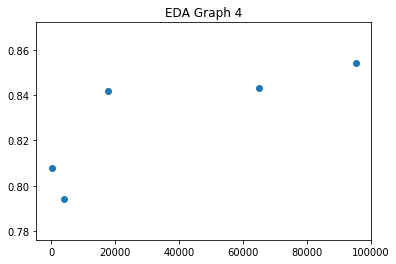

In [165]:
x1 = df_agg1[('project_is_approved', 'count')]
y1 = df_agg1[('project_is_approved', 'mean')]
plt.scatter(x1,y1)
plt.title("EDA Graph 4")
plt.show()

In [175]:
#State EDA

df_agg2 = train[['project_is_approved']].groupby(train['school_state'], sort=False).agg(['mean', 'count'])
df_agg2 = df_agg2.sort_values([('project_is_approved', 'count')],ascending=False)
df_agg2.head(15)

project_is_approved       
                            mean  count
school_state                           
CA                      0.856431  25695
TX                      0.815670  12304
NY                      0.853582  12157
FL                      0.824500  10359
NC                      0.853480   8463
IL                      0.853792   7332
GA                      0.834087   6636
SC                      0.864923   6463
MI                      0.844478   5324
PA                      0.852543   5093
IN                      0.847937   4314
MO                      0.857547   4247
OH                      0.871467   4139
MA                      0.860138   4054
LA                      0.834009   3946

In [172]:
df_agg2new= df_agg2[df_agg2[('project_is_approved', 'count')] > 2500]

x2 = df_agg2new[('project_is_approved', 'count')]
y2 = df_agg2new[('project_is_approved', 'mean')]
plt.scatter(x2,y2)
plt.title("EDA Graph 5")
plt.show()

In [174]:
# Project category EDA

df_agg3 = train[['project_is_approved']].groupby(train['project_subject_categories']).agg(['mean', 'count'])
df_agg3 = df_agg3.sort_values([('project_is_approved', 'count')],ascending=False)
df_agg3.head(15)

project_is_approved       
                                                     mean  count
project_subject_categories                                      
Literacy & Language                              0.869858  39257
Math & Science                                   0.821082  28555
Literacy & Language, Math & Science              0.867219  24499
Health & Sports                                  0.846794  16951
Music & The Arts                                 0.850006   8527
Special Needs                                    0.809483   7065
Literacy & Language, Special Needs               0.854450   6685
Applied Learning                                 0.814897   6310
Math & Science, Literacy & Language              0.861046   3843
Applied Learning, Literacy & Language            0.861208   3725
History & Civics                                 0.831974   3065
Math & Science, Special Needs                    0.825581   3010
Literacy & Language, Music & The Arts            0.838777   2878
Math & Science, Music & The Arts                 0.827961   2761
Applied Learning, Special Needs                  0.811769   2481

In [173]:
df_agg3new= df_agg3[df_agg3[('project_is_approved', 'count')] > 1000]
x3 = df_agg3new[('project_is_approved', 'count')]
y3 = df_agg3new[('project_is_approved', 'mean')]
plt.scatter(x3,y3)
plt.title("EDA Graph 6")
plt.show()